In [1]:
import matplotlib.pyplot as plt
import ants
import numpy as np
import os


/mmfs1/data/liacz/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/usr/public/anaconda/2020.07-p3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/usr/public/anaconda/2020.07-p3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## before rigid transformation

In [2]:
Brain_data_unaligned = np.load(os.path.expanduser('~/Documents/Bilingualism_CVAE/data/array_brains/unaligned/arr_combine/BRAIN_data.npy'))
Brain_subs_unaligned = np.load(os.path.expanduser('~/Documents/Bilingualism_CVAE/data/array_brains/unaligned/arr_combine/BRAIN_subs.npy'))
Brain_ds_unaligned = np.load(os.path.expanduser('~/Documents/Bilingualism_CVAE/data/array_brains/unaligned/arr_combine/BRAIN_ds.npy'))


In [3]:
codes = np.array([np.argwhere(val==np.unique(Brain_ds_unaligned))[0][0] for val in Brain_ds_unaligned])
print(np.unique(Brain_ds_unaligned, return_index=True))
np.bincount(codes.astype(int))


(array(['HCPaging', 'HCPdev', 'Hernandez', 'ds1747', 'ping'], dtype='<U32'), array([1202, 1926,    0,  360,  452]))


array([724, 571, 360,  92, 750])

In [4]:
brain_cmat_una = np.corrcoef(Brain_data_unaligned.reshape(Brain_data_unaligned.shape[0],-1))


In [5]:
ticks = np.unique(Brain_ds_unaligned, return_index=True)[1]
labels = np.unique(Brain_ds_unaligned, return_index=True)[0]

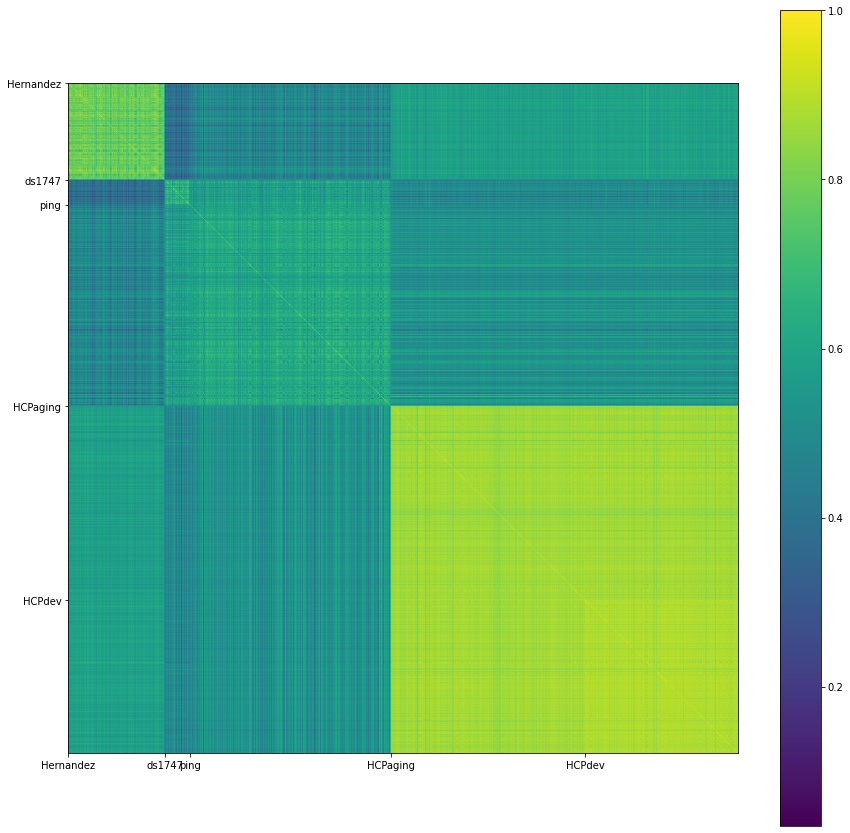

In [6]:
plt.figure(figsize=(15,15))
plt.imshow(brain_cmat_una)
plt.xticks(ticks,labels);
plt.yticks(ticks,labels);


plt.colorbar()

(array([1.400e+01, 9.500e+01, 1.810e+02, 2.550e+02, 4.240e+02, 1.059e+03,
        2.250e+02, 1.930e+02, 5.000e+01, 1.000e+00]),
 array([0.1960137 , 0.27641233, 0.35681096, 0.43720959, 0.51760822,
        0.59800685, 0.67840548, 0.75880411, 0.83920274, 0.91960137,
        1.        ]),
 <BarContainer object of 10 artists>)

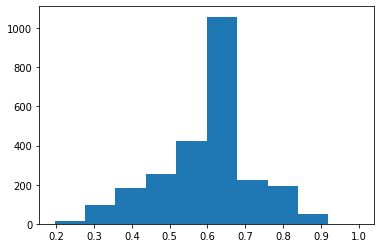

In [7]:
plt.hist(brain_cmat_una[0,:])

## after rigid transformation

In [29]:
Brain_data = np.load(os.path.expanduser('~/Documents/Bilingualism_CVAE/data/array_brains/arr_combine/8b2aa1f/BRAIN_data.npy'))
Brain_subs = np.load(os.path.expanduser('~/Documents/Bilingualism_CVAE/data/array_brains/arr_combine/8b2aa1f/BRAIN_subs.npy'))
Brain_ds = np.load(os.path.expanduser('~/Documents/Bilingualism_CVAE/data/array_brains/arr_combine/8b2aa1f/BRAIN_ds.npy'))


In [25]:
# codes = np.array([np.argwhere(val==np.unique(Brain_ds))[0][0] for val in Brain_ds])
# print(np.unique(Brain_ds, return_index=True))
# np.bincount(codes.astype(int))

(array(['HCPaging', 'HCPdev', 'Hernandez'], dtype='<U32'), array([ 360, 1084,    0]))


(1655,)

(array([  7.,  17.,  94., 236., 434., 538., 280.,  48.,   0.,   1.]),
 array([0.76852005, 0.79166804, 0.81481604, 0.83796403, 0.86111203,
        0.88426002, 0.90740802, 0.93055601, 0.95370401, 0.976852  ,
        1.        ]),
 <BarContainer object of 10 artists>)

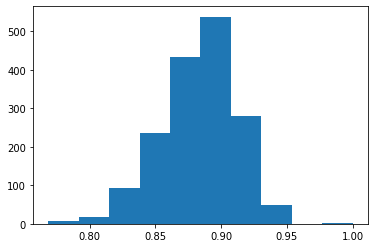

In [30]:
brain_cmat = np.corrcoef(Brain_data.reshape(Brain_data.shape[0],-1))
plt.hist(brain_cmat[0,:])

In [31]:
ticks = np.unique(Brain_ds, return_index=True)[1]
labels = np.unique(Brain_ds, return_index=True)[0]

In [35]:
np.unique(Brain_ds, return_index=True)

(array(['HCPaging', 'HCPdev', 'Hernandez'], dtype='<U32'),
 array([ 360, 1084,    0]))

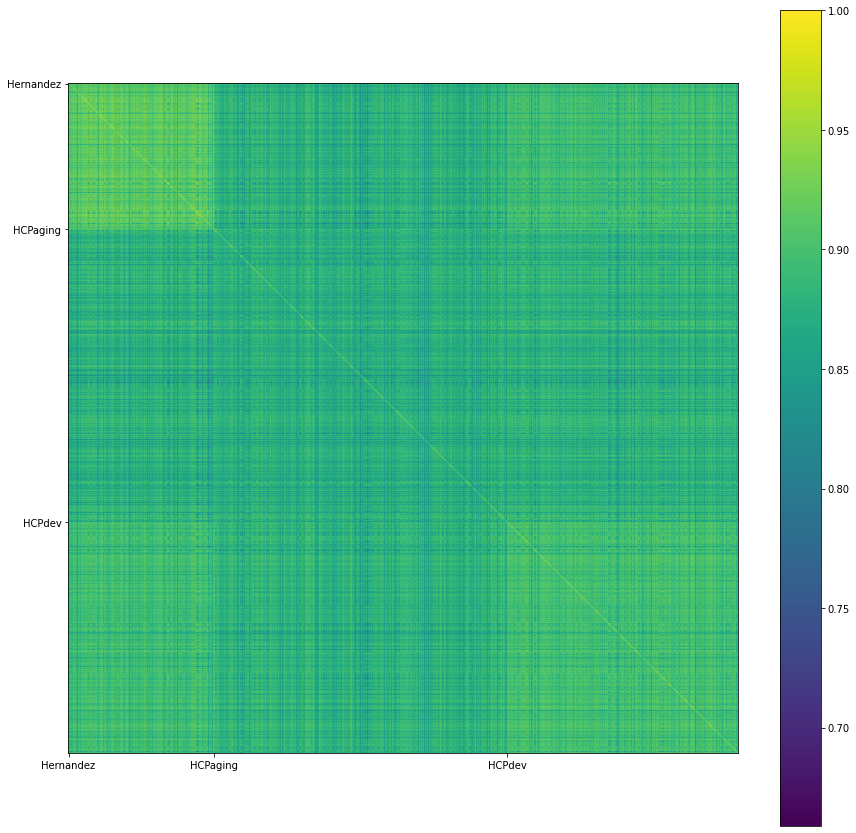

In [32]:
plt.figure(figsize=(15,15))
plt.imshow(brain_cmat)
plt.xticks(ticks,labels);
plt.yticks(ticks,labels);


plt.colorbar()

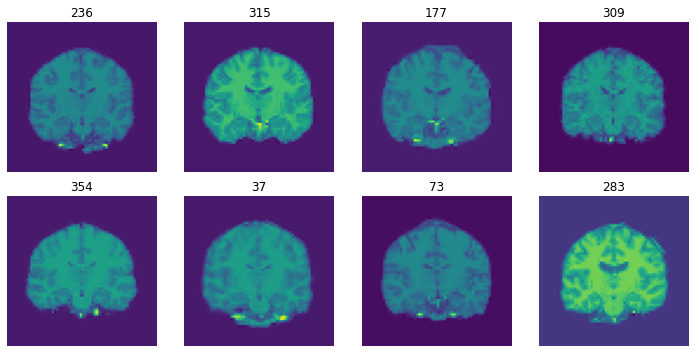

In [69]:
plt.figure(figsize=(10,5))
for i in range(8):
    plt.subplot(2,4,i+1)
    idx = np.random.randint(0,359)
#     idx = 832
    temp = Brain_data[idx,:,32,:]
    temp  = np.rot90(temp)
    plt.imshow(temp)
    plt.title(idx)
    plt.axis('off')
plt.tight_layout()

# 832 at an angle  
# 93 angled
# 336 high in scna

# lol_flat = np.array([BRAIN_data[i,:,:,:].flatten() for i in tqdm(range(BRAIN_data.shape[0]))])
# lol_cmat = np.corrcoef(lol_flat)

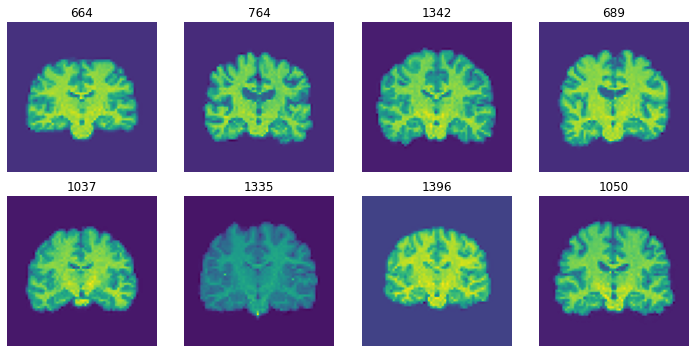

In [66]:
plt.figure(figsize=(10,5))
for i in range(8):
    plt.subplot(2,4,i+1)
    idx = np.random.randint(360,1655)
#     idx = 832
    temp = Brain_data[idx,:,32,:]
    temp  = np.rot90(temp)
    plt.imshow(temp)
    plt.title(idx)
    plt.axis('off')
plt.tight_layout()

In [57]:
BRAIN_data_mean = BRAIN_data.reshape(BRAIN_data.shape[0],-1).mean(axis=0)

NameError: name 'BRAIN_data' is not defined

In [58]:
corr2mean = np.array([np.corrcoef(BRAIN_data.reshape(BRAIN_data.shape[0],-1)[s,:],BRAIN_data_mean)[0,1] for s in range(BRAIN_data.shape[0])])

NameError: name 'BRAIN_data' is not defined

In [ ]:
I = corr2mean.argsort()

In [ ]:
plt.imshow(np.rot90(BRAIN_data.mean(axis=0)[:,32,:]))
plt.axis('off')

In [ ]:
I[-5::]

In [ ]:
BRAIN_data[600,0,0,0]

In [ ]:
for i in range(5):
    plt.figure()
    #plt.imshow(np.rot90(BRAIN_data[I[BRAIN_data.shape[0]-i-1],:,32,:])) # Most similar
    #plt.imshow(np.rot90(BRAIN_data[I[i],35,:,:])) # Most similar
    plt.imshow(np.rot90(BRAIN_data[I[i],:,32,:])) # Most similar
    plt.axis('off')

In [ ]:
brain_cmat_triu = brain_cmat[np.triu_indices(BRAIN_data.shape[0],1)]
print((brain_cmat_triu.min(),brain_cmat_triu.max()))

In [ ]:
codes = np.array([np.argwhere(val==np.unique(BRAIN_ds))[0][0] for val in BRAIN_ds])

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(brain_cmat)

ticks = np.arange(0,BRAIN_data.shape[0],200)
lbls  = codes[ticks]


plt.xticks(ticks,labels=lbls);
plt.yticks(ticks,labels=lbls);
#plt.colorbar()

In [15]:
for u in range(4):
    site_brainz = BRAIN_data[codes==u,:,:,:].mean(axis=0)

    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.imshow(np.rot90(site_brainz[:,32,:]))
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(np.rot90(site_brainz[32,:,:]))
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(np.rot90(site_brainz[:,:,32]))
    plt.axis('off')
    plt.suptitle(np.unique(BRAIN_ds)[u],fontsize=16)

NameError: name 'BRAIN_data' is not defined